In [2]:
import requests
import json

def get_asteroid_data(query, limit):
    url = "http://asterank.com/api/asterank"
    params = {
        "query": json.dumps(query),
        "limit": limit
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Test the function
query = {
    "e": {"$lt": 0.1},
    "i": {"$lt": 4},
    "a": {"$lt": 1.5}
}
limit = 1
data = get_asteroid_data(query, limit)
print(data)


[{'sigma_tp': 4.1004e-05, 'diameter': '', 'sigma_q': 4.1207e-08, 'epoch_mjd': 58600.0, 'ad': 1.459803525972257, 'producer': 'Otto Matic', 'rms': 0.54503, 'H_sigma': '', 'closeness': 4098.1524578206245, 'spec_B': 'T', 'K2': '', 'K1': '', 'M1': '', 'two_body': '', 'full_name': '138911 (2001 AE2)', 'M2': '', 'sigma_per': 1.3361e-06, 'equinox': 'J2000', 'DT': '', 'diameter_sigma': '', 'saved': -66236938043.31114, 'albedo': '', 'moid_ld': 90.91089034, 'pha': 'N', 'neo': 'Y', 'sigma_ad': 2.2706e-09, 'PC': '', 'profit': 28914.585070637186, 'est_diameter': 0.4959973445799733, 'sigma_w': 9.9056e-05, 'sigma_i': 3.1569e-06, 'per': 572.6786571657711, 'id': 'a0138911', 'A1': '', 'data_arc': 12168.0, 'A3': '', 'score': 2.645069073276984e-07, 'per_y': 1.56790871229506, 'sigma_n': 1.4667e-09, 'epoch_cal': 20190427.0, 'orbit_id': 129.0, 'sigma_a': 2.0992e-09, 'sigma_om': 9.6768e-05, 'A2': '', 'sigma_e': 3.0757e-08, 'condition_code': 0.0, 'rot_per': 15.88, 'prov_des': '2001 AE2', 'G': '', 'last_obs': '2

In [ ]:
for k, v in data[0].items():
    print(f"{k}: {v}")

In [6]:
query = {"full_name": "162173 Ryugu (1999 JU3)"}

limit = 1
data = get_asteroid_data(query, limit)
print(data)

[{'sigma_tp': 3.3258e-05, 'diameter': '', 'sigma_q': 4.7907e-08, 'epoch_mjd': 55907.0, 'ad': 1.41589353455803, 'producer': 'Davide Farnocchia', 'rms': 0.35206, 'H_sigma': '', 'closeness': 5792.5715077837185, 'spec_B': 'Cg', 'K2': '', 'K1': '', 'M1': '', 'two_body': '', 'full_name': '162173 Ryugu (1999 JU3)', 'M2': '', 'sigma_per': 1.9878e-06, 'equinox': 'J2000', 'DT': '', 'diameter_sigma': '', 'saved': -69053443881.75815, 'albedo': '', 'moid_ld': 0.24841071353, 'pha': 'Y', 'neo': 'Y', 'sigma_ad': 3.9592e-09, 'PC': '', 'profit': 30080459216.340637, 'est_diameter': 0.47367378676019345, 'sigma_w': 4.1484e-05, 'sigma_i': 3.9603e-06, 'per': 473.9148422005283, 'id': 'a0162173', 'A1': '', 'data_arc': 11075.0, 'A3': '', 'score': 289.6485753891859, 'per_y': 1.2975081237523, 'sigma_n': 3.1861e-09, 'epoch_cal': 20111212.0, 'orbit_id': 'JPL 120', 'sigma_a': 3.3264e-09, 'sigma_om': 3.7157e-05, 'A2': -3.37188018015251e-14, 'sigma_e': 4.0878e-08, 'condition_code': 0.0, 'rot_per': 7.627, 'prov_des': '

In [3]:
spec_asteroids = []
for spec_type in ["M", "S", "C"]:
    query = {"spec": spec_type}
    limit = 4000
    data = get_asteroid_data(query, limit)
    print(len(data))
    spec_asteroids.extend([str(astr) for astr in data])

19
461
226


In [3]:
import openai
from babydragon.memory.indexes.memory_index import MemoryIndex
from babydragon.memory.kernels.memory_kernel import MemoryKernel
from babydragon.tasks.llm_task import LLMReader, LLMWriter
from babydragon.chat.chat import Chat

openai.api_key = ""


/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:

def summary_prompt(paragraph):
    return f"Can you summarize these asteroid specs into a clean format. write a short write up about the asteroid and speculate about the chemical composition.\n\n {paragraph}\n"

index = MemoryIndex(values=spec_asteroids, name="asteroid_spectral_index", is_batched=True)
summarizer = Chat( user_prompt=summary_prompt, max_output_tokens=3000)

/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
target_index = index
path = [[x] for x in range(len(target_index.values))]
summary_task = LLMWriter(
    index=target_index,
    path=path,
    chatbot=summarizer,
    max_workers=8,
    task_id="summary_kernel",
)
summary_task.save_path = "asteroid_spectral_index_summary_lg"
summary_task.save_path

setting up savepath


'asteroid_spectral_index_summary_lg'

In [ ]:
ast_summary =  summary_task.write()

In [9]:
ast_summary

In [8]:
index = MemoryIndex(name="asteroid_spectral_index_summary_lg",load=True, is_batched=True)

Loading index from storage/asteroid_spectral_index_summary_lg
storage/asteroid_spectral_index_summary_lg/asteroid_spectral_index_summary_lg_embeddings.npz


In [ ]:
#from babydragon.memory.kernels.memory_kernel import MemoryKernel
#summary_index_path = "/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/storage/asteroid_spectral_index_summary_lg"
#multi_kernel_dict = {
#    "asteroid_spectral_kernel": MemoryKernel(mem_index=index, name="asteroid_spectral_kernel"),
#    "asteroid_spectral_summary_kernel": MemoryKernel(mem_index=ast_summary, name="asteroid_spectral_summary_kernel")
#}

In [4]:
save_path = "/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/storage"
index = MemoryIndex(name="asteroid_spectral_index_summary", save_path=save_path, load=True)


Loading index from /Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/storage/asteroid_spectral_index_summary
/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/storage/asteroid_spectral_index_summary/asteroid_spectral_index_summary_embeddings.npz


In [21]:
#index.save()

In [5]:
multi_kernel_dict = {
    "asteroid_spectral_summary_kernel": MemoryKernel(mem_index=index, name="asteroid_spectral_summary_kernel")
}

Creating a new index from a faiss index and values list
705  values in the index
705  embeddings in the index
Computing the adjacency matrix
Embeddings shape:  (705, 1536)
Computing the k-hop adjacency matrix and aggregated features
Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 2/2 [00:00<00:00, 15.82it/s]


Updating the memory index
Creating a new index
0  values in the index
0  embeddings in the index
Creating a new index from a list of embeddings and values
705  values in the index
705  embeddings in the index


In [28]:
multi_kernel_dict["asteroid_spectral_summary_kernel"].save()

In [6]:
from babydragon.memory.kernels.multi_kernel import SpectralClusteringMultiKernel, HDBSCANMultiKernel
from babydragon.memory.kernels.multi_kernel_visualization import MultiKernelVisualization
from babydragon.chat.chat import Chat
from babydragon.tasks.multi_kernel_task import MultiKernelTask

Kernel: asteroid_spectral_summary_kernel
Path Group: [[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 28, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 146, 148, 149, 151, 152, 153, 155, 159, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 174, 176, 177, 179, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 205, 206, 208, 210, 211, 212, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 2

/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


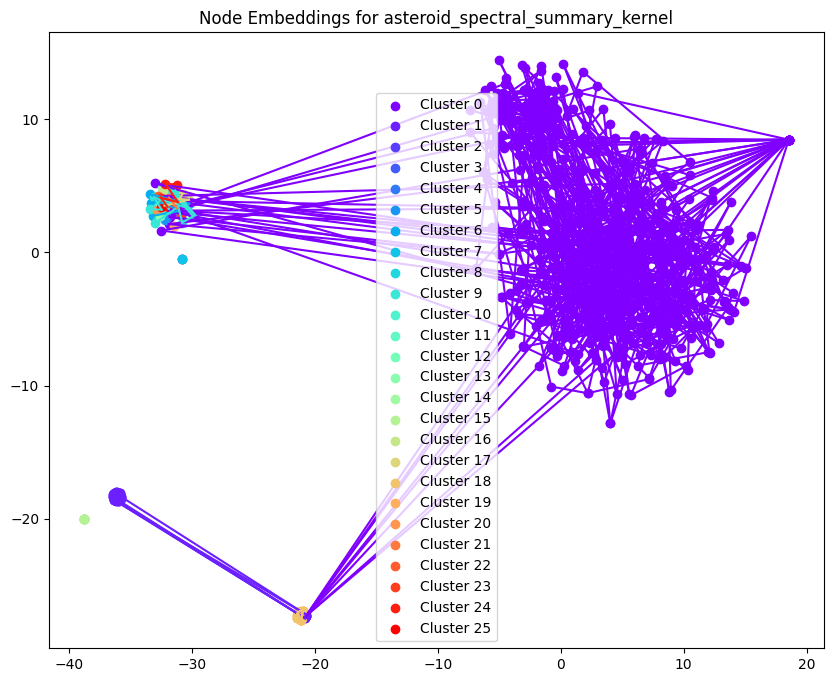

Kernel: asteroid_spectral_summary_kernel


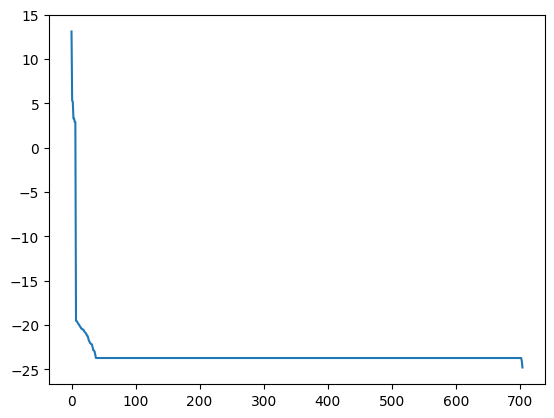

In [7]:
vis = MultiKernelVisualization(SpectralClusteringMultiKernel(multi_kernel_dict))
vis.visualize_paths()
vis.plot_singular_values()

Kernel: asteroid_spectral_summary_kernel
Path Group: [[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 28, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 57, 59, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 116, 118, 119, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 146, 148, 149, 151, 152, 153, 155, 159, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 174, 176, 177, 179, 180, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 205, 206, 208, 210, 211, 212, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 269, 272, 273, 274, 275, 276, 2

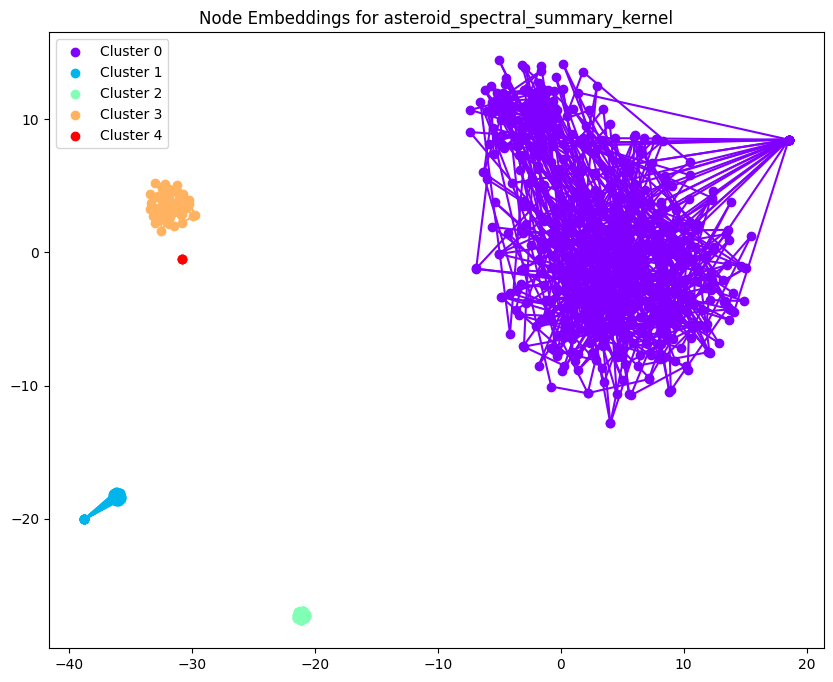

Kernel: asteroid_spectral_summary_kernel


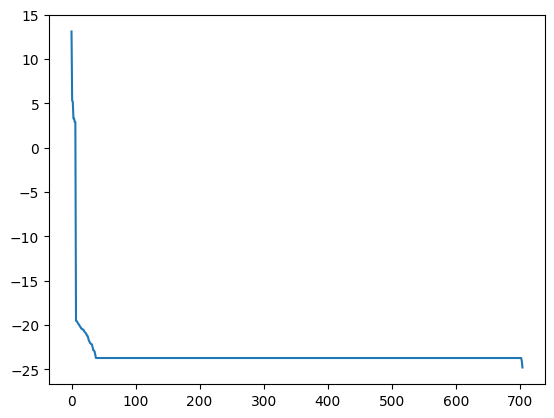

In [12]:
vis = MultiKernelVisualization(HDBSCANMultiKernel(multi_kernel_dict))
vis.visualize_paths()
vis.plot_singular_values()

In [8]:
def ideation_prompt(paragraph):
    return f"Review the following asteroid specifications brainstorm potential constructions, blueprints, missions, or applications that could be built using its resources.\n\n{paragraph}\n"
system_prompt = """
Imagine yourself as a world-class space engineer, explorer and astrobiologist. You have been given a task to utilize the resources from a variety of asteroids to build innovative space structures.
What is the most important resource to consider? What is the most important structure to build? What is the most important mission to accomplish? What is the most important application to develop? What is the most important blueprint to design?
Given the composition and resources of each asteroid, brainstorm and combine the resources from different asteroids to ideate unique and feasible constructions.
"""

explorer = Chat( user_prompt=ideation_prompt,  max_output_tokens=3000)
clustering_method = "HDBSCAN"



In [9]:
target_index = vis.memory_kernel_group.memory_kernel_dict["asteroid_spectral_summary_kernel"]
target_index.name

'asteroid_spectral_summary_kernel'

In [10]:
path = vis.memory_kernel_group.path_group['asteroid_spectral_summary_kernel']


In [11]:

explore_task = LLMWriter(
    index=target_index,
    path=path,
    chatbot=explorer,
    max_workers=8,
    task_id="explorer_kernel",
)
explore_task.save_path = "asteroid_spectral_explorer_kernel"
explore_task.save_path


setting up savepath


'asteroid_spectral_explorer_kernel'

In [ ]:
ast_explorer =  explore_task.write()

In [17]:
len(target_index.values)

705

In [16]:
len(explore_task.index.values)

705

In [11]:
'''
multi_kernel_task = MultiKernelTask(
    memory_kernel_dict=multi_kernel_dict,
    chatbot=explorer,
    parent_kernel_label="asteroid_spectral_summary_kernel",
    child_kernel_label="asteroid_spectral_explorer_kernel",
    system_prompt=system_prompt,
    path_group=vis.memory_kernel_group.path_group,
    clustering_method=clustering_method,
    max_workers=1,
)
'''

Using HDBSCAN
setting up savepath


In [12]:
#multi_kernel_task.execute_task()

Error loading results from file: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)
Starting from scratch.
Executing task MultiKernelTask using 1 workers.
Current_node: 0, size of values 705
Trying to call OpenAI API...
Keyboard interrupt detected, stopping task execution.


In [23]:
ast_explorer

dict_keys(['asteroid_spectral_summary_kernel'])

In [27]:
multi_kernel_dict['asteroid_spectral_explorer_kernel'] = MemoryKernel(mem_index=ast_explorer, name="asteroid_spectral_explorer_kernel")

Creating a new index from a faiss index and values list
119  values in the index
119  embeddings in the index
Computing the adjacency matrix
Embeddings shape:  (119, 1536)
Computing the k-hop adjacency matrix and aggregated features
Compute the k-hop adjacency matrix
Aggregate the messages from the k-hop neighborhood:


100%|██████████| 2/2 [00:00<00:00, 474.95it/s]

Updating the memory index
Creating a new index
0  values in the index
0  embeddings in the index
Creating a new index from a list of embeddings and values
119  values in the index
119  embeddings in the index


In [28]:
multi_kernel_dict.keys()

dict_keys(['asteroid_spectral_summary_kernel', 'asteroid_spectral_explorer_kernel'])

Kernel: asteroid_spectral_summary_kernel
Path Group: [[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 28, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 146, 148, 149, 151, 152, 153, 155, 159, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 174, 176, 177, 179, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 205, 206, 208, 210, 211, 212, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 2

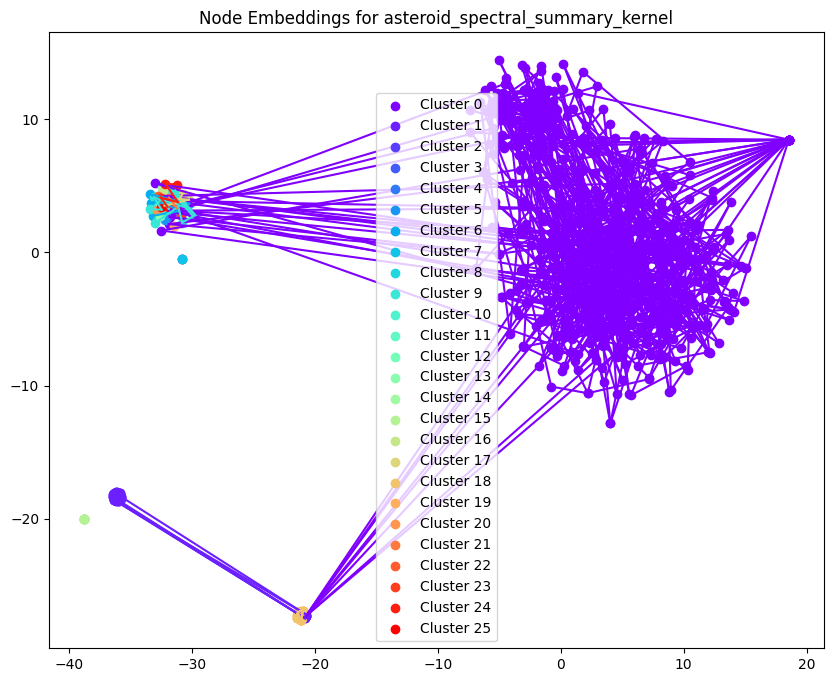

Kernel: asteroid_spectral_explorer_kernel
Path Group: [[78], [5, 23, 40, 57, 58, 71, 72, 85, 87, 108, 110, 111, 115], [0], [47, 86], [11, 14, 19, 22, 48, 59, 74, 80, 91, 101, 102, 105], [1, 2, 3, 8, 10, 12, 13, 17, 18, 25, 27, 29, 31, 32, 36, 45, 49, 51, 55, 56, 61, 65, 69, 70, 73, 77, 84, 88, 90, 92, 95, 100, 103, 106, 109, 113, 114, 116, 117, 118], [63], [4, 7, 15, 20, 24, 26, 30, 35, 37, 39, 42, 52, 53, 54, 60, 62, 64, 66, 67, 79, 81, 82, 83, 97, 99, 104, 112], [34], [33], [6], [96, 98], [107], [89], [75, 76], [21], [9], [41], [16], [68], [28], [43, 44], [93, 94], [38], [50], [46]]


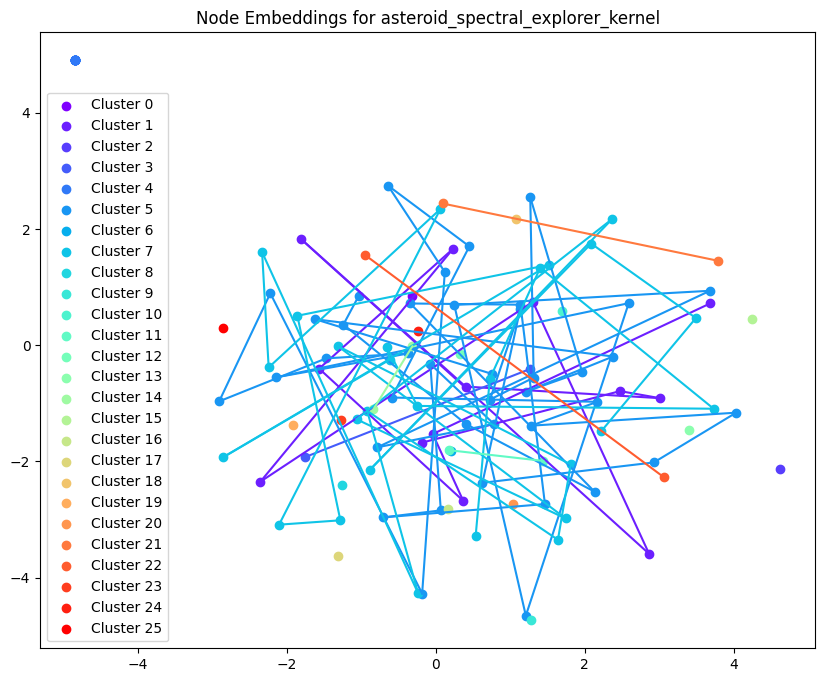

Kernel: asteroid_spectral_summary_kernel


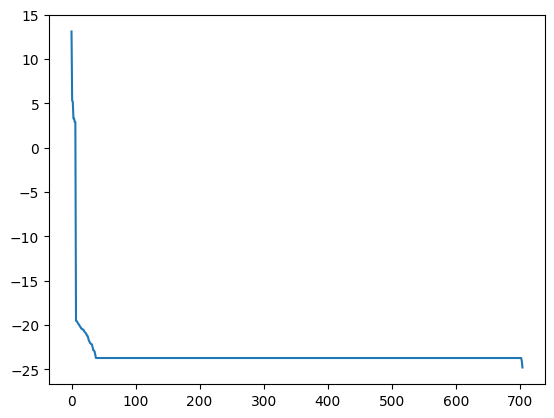

Kernel: asteroid_spectral_explorer_kernel


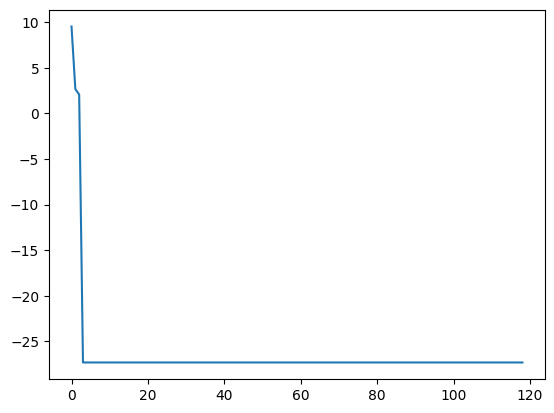

In [29]:
vis = MultiKernelVisualization(SpectralClusteringMultiKernel(multi_kernel_dict))
vis.visualize_paths()
vis.plot_singular_values()

Kernel: asteroid_spectral_summary_kernel
Path Group: [[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 28, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 57, 59, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 116, 118, 119, 121, 122, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 146, 148, 149, 151, 152, 153, 155, 159, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 174, 176, 177, 179, 180, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 205, 206, 208, 210, 211, 212, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 269, 272, 273, 274, 275, 276, 2

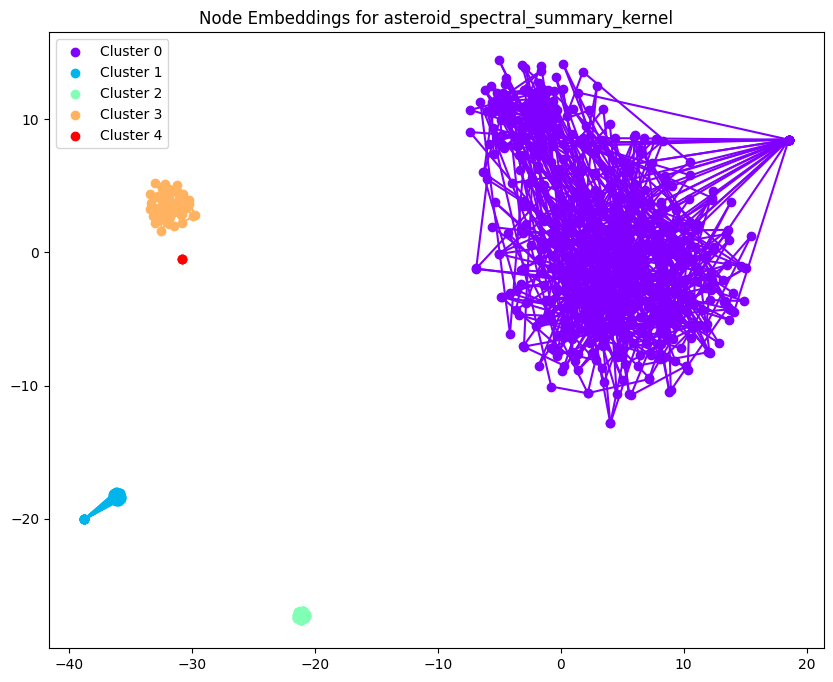

Kernel: asteroid_spectral_explorer_kernel
Path Group: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]]


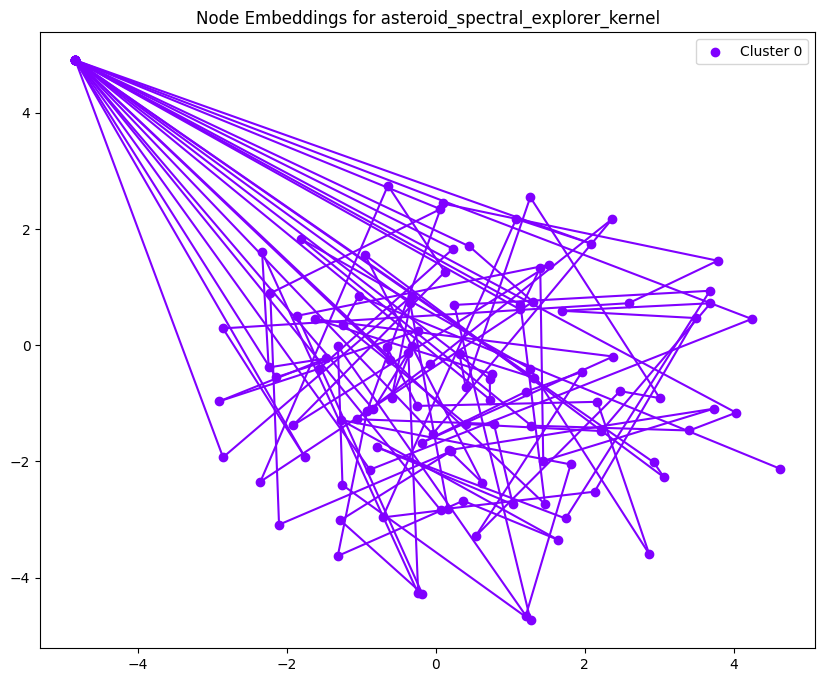

Kernel: asteroid_spectral_summary_kernel


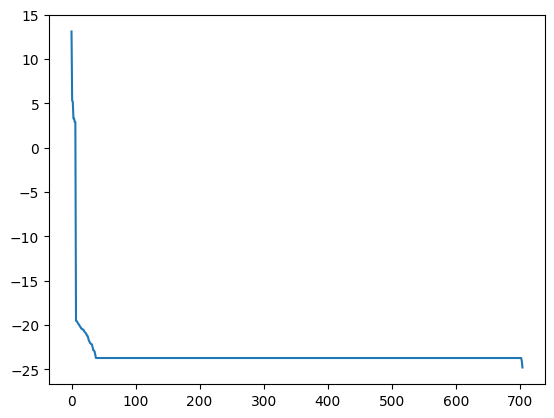

Kernel: asteroid_spectral_explorer_kernel


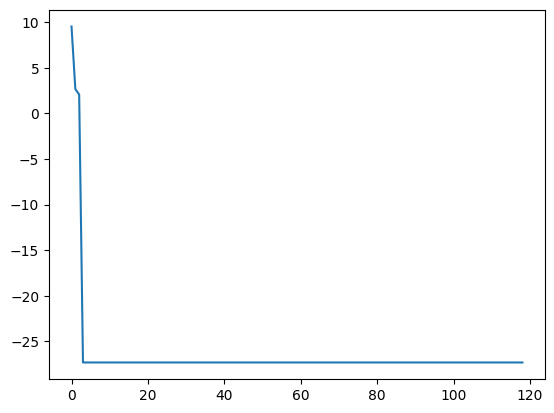

In [30]:
vis = MultiKernelVisualization(HDBSCANMultiKernel(multi_kernel_dict))
vis.visualize_paths()
vis.plot_singular_values()

In [ ]:
#https://github.com/typpo/spacekit